In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


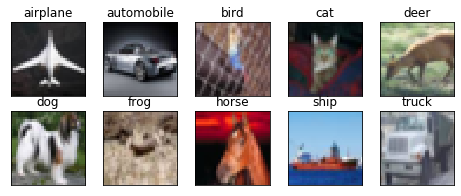

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [41]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [42]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_98 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_99 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 13s 35ms/step - loss: 1.8774 - acc: 0.2850 - val_loss: 1.4818 - val_acc: 0.4507
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.3801 - acc: 0.4958 - val_loss: 1.1547 - val_acc: 0.5799
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.1604 - acc: 0.5878 - val_loss: 1.0210 - val_acc: 0.6368
Epoch 4/50
390/390 [==============================] - 8s 19ms/step - loss: 1.0230 - acc: 0.6374 - val_loss: 0.9131 - val_acc: 0.6817
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.9182 - acc: 0.6797 - val_loss: 0.8196 - val_acc: 0.7167
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8488 - acc: 0.7064 - val_loss: 0.7629 - val_acc: 0.7338
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7846 - acc: 0.7300 - val_loss: 0.7274 - val_acc: 0.7524
Epoch 8/50
390/390 [==============================] - 8s 20ms/step -

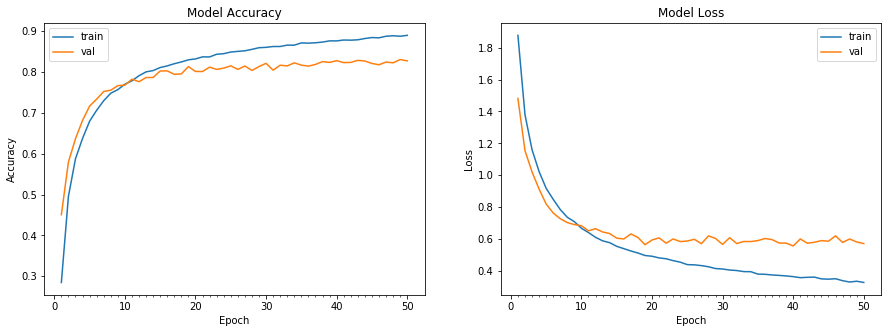

Accuracy on test data is: 82.75


In [43]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [38]:
model1 = Sequential()
model1.add(SeparableConvolution2D(filters = 48, kernel_size=(3, 3), 
           strides = (1,1), depth_multiplier = 1,
            input_shape = (32,32,3))) #Receptive Field = 3x3     #output=(32+2*0-3)+1=30
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(96, (3, 3), use_bias=False)) #Receptive field = 5x5 #output=(30+2*0-3)+1=28
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(96, (3, 3), padding='same', use_bias=False)) #Receptive field = 7x7 #output=(30+2*1-3)+1=28
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(192, (3, 3), use_bias=False)) #Receptive field = 9x9 #output=(28+2*0-3)+1=26
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(SeparableConvolution2D(48, (1, 1), use_bias=False)) #Receptive field = 9x9 #output=(26+2*0-1)+1=26

model1.add(MaxPooling2D(pool_size=(2, 2))) #Receptive field = 10x10 #output=(26+2*1-2)/2 +1 = 13 

model1.add(SeparableConvolution2D(48, (3, 3), use_bias=False)) #Receptive field = 14x14 #output=(13+2*0-3)+1=11
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(96, (3, 3), use_bias=False)) #Receptive field = 18x18 #output=(11+2*0-3)+1=9
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(96, (3, 3), padding='same', use_bias=False)) #Receptive field = 22x22 #output=(9+2*1-3)+1=9
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(SeparableConvolution2D(192, (3, 3), use_bias=False)) #Receptive field = 26x26 #output=(9+2*0-3)+1=7
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(MaxPooling2D(pool_size=(2, 2))) #Receptive field = 28x28 #output=1+(7-2)/2=3

model1.add(SeparableConvolution2D(num_classes, 3, 3)) 
model1.add(BatchNormalization())
#model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Activation('softmax'))


# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (3, 3))`


In [39]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_90 (Separab (None, 30, 30, 48)        219       
_________________________________________________________________
batch_normalization_81 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_89 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_91 (Separab (None, 28, 28, 96)        5040      
_________________________________________________________________
batch_normalization_82 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
activation_90 (Activation)   (None, 28, 28, 96)        0         
_________________________________________________________________
separable_conv2d_92 (Separab (None, 28, 28, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.5.
390/390 [==============================] - 41s 104ms/step - loss: 1.7550 - acc: 0.3471 - val_loss: 4.9031 - val_acc: 0.2188
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.3790750569.
390/390 [==============================] - 32s 82ms/step - loss: 1.4327 - acc: 0.4762 - val_loss: 2.8893 - val_acc: 0.3499
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.3052503053.
390/390 [==============================] - 32s 82ms/step - loss: 1.2531 - acc: 0.5467 - val_loss: 1.5718 - val_acc: 0.4985
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.2554931017.
390/390 [==============================] - 32s 82ms/step - loss: 1.1321 - acc: 0.5946 - val_loss: 1.4269 - val_acc: 0.5404
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.2196836555.
390/390 [==============================] - 32s 82ms/step - loss: 1.0511 - acc: 0.6261 

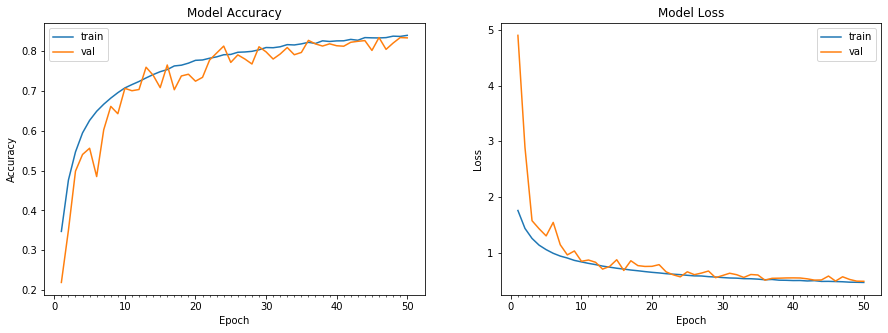

Accuracy on test data is: 83.35


In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

datagen = ImageDataGenerator(zoom_range=0.1, 
                             rotation_range=15,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)


def scheduler(epoch, lr):
  return round(0.5 * 1/(1 + 0.319 * epoch), 10)
  if epoch < 15:
    return 0.1
  elif epoch < 25:
    return 0.1
  elif epoch < 35:
    return 0.05
  elif epoch < 45:
    return 0.05
  else :
    return 0.01


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                  callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))